# Creating convolution neural networks (CNN) with Keras

This notebook goes over creating a convolution neural network in Keras. To for the basics see the Creating Neural Network notebook.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import fashion_mnist  # Fashion MNIST dataset is included in Keras
from keras.models import Sequential, Model  # Neural network Model type to be used


from keras.layers.core import Dense, Dropout, Activation  # Types of layers to be used in our model
from keras.layers import Conv2D, MaxPooling2D, Flatten  # Added for layers needed for CNN
from keras.layers.normalization import BatchNormalization  #Added for CNN
from keras.utils import np_utils  # NumPy related tools

## Preparing the data

This part is similar to how we prepared data for a dense neural network but we won't flatten the images into a one dimensional vector. That way the convolution layers can use the spatial data in the image (a pixel's neighboring pixels) to better understand the image.

### Download dataset from Keras

We download the data and separate it into **training** and **testing** sets. Each of these are separated into **x** (input images) and **y** (output labels). We also create a list to hold the names of the various classes detected by the network.

In [0]:
(training_input, training_output), (test_input, test_output) = fashion_mnist.load_data()

example_images = test_input[:9]
example_labels = test_output[:9]

LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


### Preview dataset

Lets take a look at what makes up the dataset we will use.

Training input shape:  (60000, 28, 28)
Training output shape:  (60000,)
Test input shape:  (10000, 28, 28)
Test output shape:  (10000,)


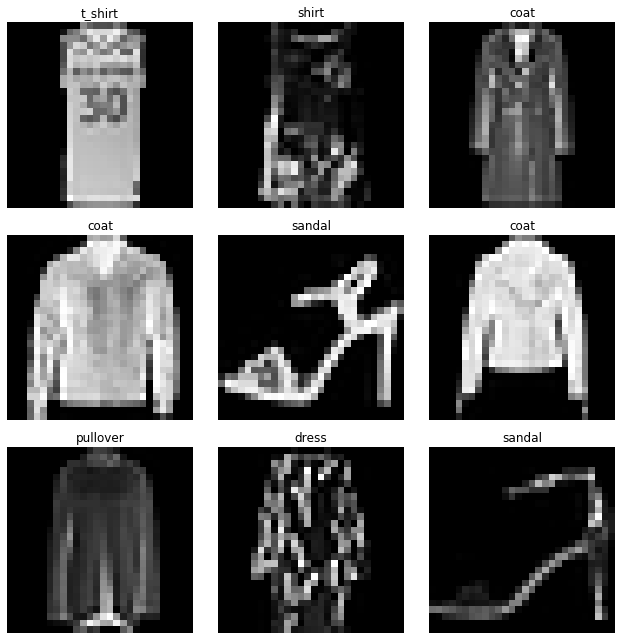

In [10]:
print('Training input shape: ', training_input.shape)
print('Training output shape: ', training_output.shape)
print('Test input shape: ', test_input.shape)
print('Test output shape: ', test_output.shape)

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    index = random.randint(0, len(training_input))
    image = training_input[index]
    labelIndex = training_output[index]
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(LABEL_NAMES[labelIndex])
    
plt.tight_layout()

### Reshape output index to vector with one value for each category.

We still need a 1 by 10 output vectors for our training and testing data.

In [11]:
num_classes = 10 # number of unique digits

training_output = np_utils.to_categorical(training_output, num_classes)
test_output = np_utils.to_categorical(test_output, num_classes)

print("training_output shape: ", training_output.shape)
print("test_output shape: ", test_output.shape)
print("First output vector: ", test_output[0])

training_output shape:  (60000, 10)
test_output shape:  (10000, 10)
First output vector:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Preparing our input images

We will skip reshaping our input with a CNN but still need to normalize the pixel data (a integer between 0 and 255) into a floating point number beteen 0 and 1.0.

In [24]:
training_input = training_input.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
test_input = test_input.reshape(10000, 28, 28, 1)

training_input = training_input.astype('float32')
test_input = test_input.astype('float32')

training_input = training_input / 255
test_input = test_input / 255

print('training_input shape: ', training_input.shape)
print('training_output shape: ', training_output.shape)
print('training_input shape: ', test_input.shape)
print('training_output shape: ', test_output.shape)

training_input shape:  (60000, 28, 28, 1)
training_output shape:  (60000, 10)
training_input shape:  (10000, 28, 28, 1)
training_output shape:  (10000, 10)


## Building the network with Keras

For a CNN we add three types of layers, convolution, pooling and flatten. 

We also add a normalization to the convolution kernels before using them. This greatly increases the models accuracy.

In [0]:
model = Sequential()

In [38]:
# First layer (CONVOLUTION)
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation function

# Second layer (POOLING)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer (CONVOLUTION)
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))

# Fourth layer (POOLING)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fifth layer (FLATTEN)
model.add(Flatten())

# Sixth layer (DENSE)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Seventh layer (OUTPUT)
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)      

### Compile the model

Now we can take our model with the layers we have added and compile it into a network that is ready to train. Two important features we need to se are the loss function and optimizer. 

The loss function is how we plan to evaluate how close the network came the right answer.

The optimizer is the method used to try and reduce the loss on the next epoch of training.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train and test the network

Running the fit method will send the training set through the network (forward propogation) then adjust the weights to reduce the loss/error (back propogation). Each epoch represents passing the training set through the network one full time. Each epoch accumulates improvents from the previous epoch.

In [40]:
model.fit(training_input, training_output, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 87s 1ms/step - loss: 0.6392 - acc: 0.7665
Epoch 2/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.4338 - acc: 0.8418
Epoch 3/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3857 - acc: 0.8593
Epoch 4/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3604 - acc: 0.8693
Epoch 5/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.3414 - acc: 0.8750


### Evaluate training


After we have completed the training we can evaluate it against our test dataset.

In [41]:
score = model.evaluate(test_input, test_output)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 7s 657us/step
Test score: 6.719698097229004
Test accuracy: 0.1767


## Using the model to predict.

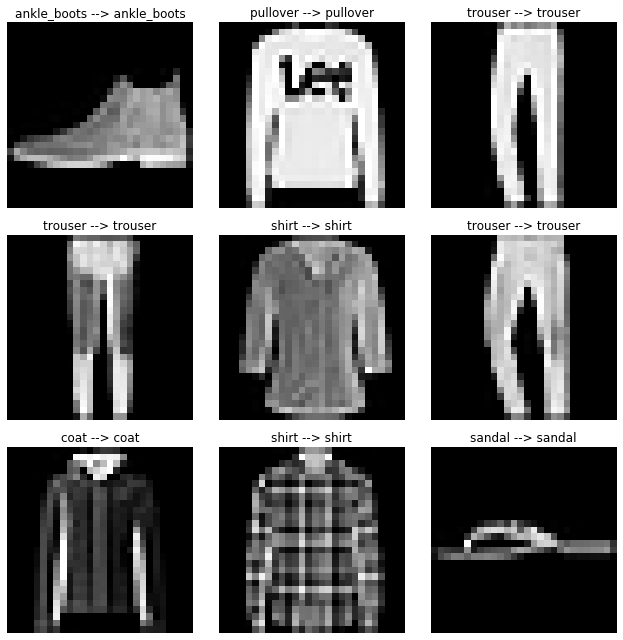

In [42]:
example_images_vectors = example_images.reshape(9, 28, 28, 1)
example_images_vectors = example_images_vectors.astype('float32')
example_images_vectors = example_images_vectors / 255

predictions = model.predict(example_images_vectors)

most_likely = [np.argmax(prediction) for prediction in predictions]
predicted_labels = [LABEL_NAMES[index] for index in most_likely]

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    image = example_images[i]
    label = LABEL_NAMES[example_labels[i]] + " --> " + predicted_labels[i]
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(label)
    
plt.tight_layout()

## Saving and loading models

See the Keras_CreatingNeuralNetwork notebook for saving and loading models.